# Trend Changepoints

We may have noticed that real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if we wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use

## Automatic changepoint detection in Prophet

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. Consider the Peyton Manning forecast from the Quickstart. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

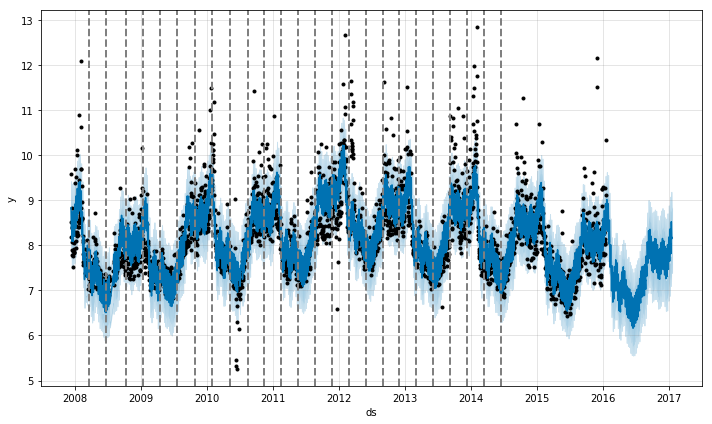

Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused. We can see this by plotting the magnitude of the rate change at each changepoint:

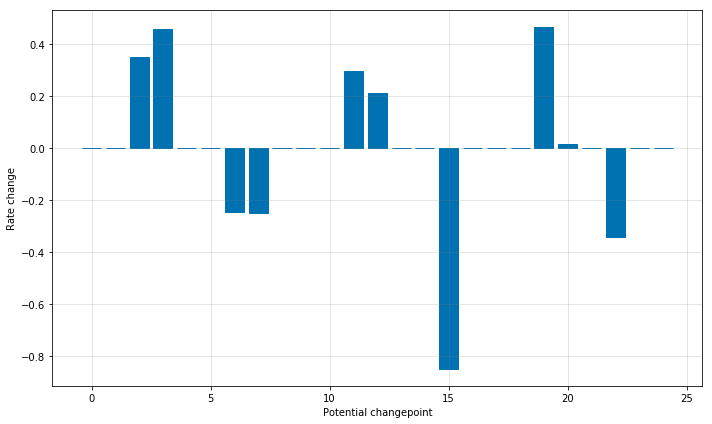

The number of potential changepoints can be set using the argument n_changepoints, but this is better tuned by adjusting the regularization. The locations of the signification changepoints can be visualized with:

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('../input/peyton-manning/example_wp_log_peyton_manning.csv')
df.head()

In [ ]:
m = Prophet()
m.fit(df)



In [ ]:
future = m.make_future_dataframe(periods=1461)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m.changepoints

By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the changepoint_range argument. For example, m = Prophet(changepoint_range=0.9) in Python will place potential changepoints in the first 90% of the time series.

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
fst = pro_change.fit(df).predict(future)
fig1= pro_change.plot(fst);
a = add_changepoints_to_plot(fig1.gca(), pro_change, fst)

In [ ]:
pro_change.changepoints

## Adjusting trend flexibility

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Decreasing it will make the trend less flexible:

In [ ]:
n = Prophet(changepoint_prior_scale=0.001)
forecastn = n.fit(df).predict(future)
fign = n.plot(forecastn)

When visualizing the forecast, this parameter can be adjusted as needed if the trend seems to be over- or under-fit. In the fully-automated setting, see the documentation on cross validation for recommendations on how this parameter can be tuned.

## Specifying the locations of the changepoints

If we wish, rather than using automatic changepoint detection we can manually specify the locations of potential **changepoints** with the changepoints argument. Slope changes will then be allowed only at these points, with the same sparse regularization as before. One could, for instance, create a grid of points as is done automatically, but then augment that grid with some specific dates that are known to be likely to have changes. As another example, the changepoints could be entirely limited to a small set of dates, as is done here:

In [ ]:
o = Prophet(changepoints=['2014-01-01'])
forecast2 = o.fit(df).predict(future)
fig3 = o.plot(forecast2)